In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\Basel\Desktop\Data Analysis Projects\Python  Customer Churn Analysis Prediction\Telecom Churn.csv")

In [3]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
df['churn'].unique()

array([False,  True])

In [6]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: title={'center': 'Churn Proportions'}, xlabel='churn', ylabel='Count'>

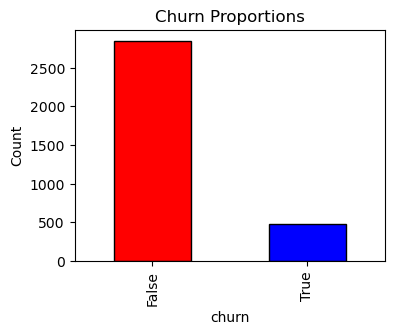

In [7]:
df['churn'].value_counts().plot(kind='bar',figsize=(4,3),ylabel='Count',title="Churn Proportions",color=['red','blue'],edgecolor='black')

In [8]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [9]:
df.groupby('churn')['customer service calls'].sum()

churn
False    4132
True     1077
Name: customer service calls, dtype: int64

<Axes: title={'center': 'Customer Service Calls VS Churn'}, xlabel='churn', ylabel='customer service calls'>

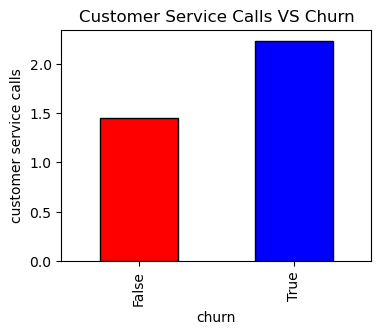

In [10]:
df.groupby('churn')['customer service calls'].mean().plot(kind='bar',figsize=(4,3),ylabel='customer service calls',title="Customer Service Calls VS Churn",color=['red','blue'],edgecolor='black')

In [11]:
df.groupby('state')[['churn']].value_counts().to_frame()

count
state churn       
AK    False     49
      True       3
AL    False     72
      True       8
AR    False     44
...            ...
WI    True       7
WV    False     96
      True      10
WY    False     68
      True       9

[102 rows x 1 columns]

In [12]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

<Axes: ylabel='Frequency'>

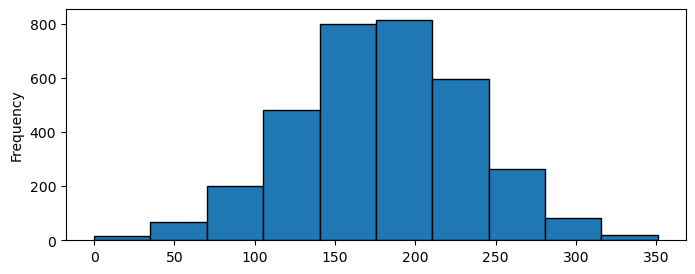

In [13]:
df['total day minutes'].plot(kind='hist',edgecolor='black',figsize=(8,3))

In [14]:
df.groupby('churn')['total day charge'].mean()

churn
False    29.780421
True     35.175921
Name: total day charge, dtype: float64

<Axes: title={'center': 'Churn Vs Daily Charge "Average"'}, xlabel='churn', ylabel='Daily Charge Average'>

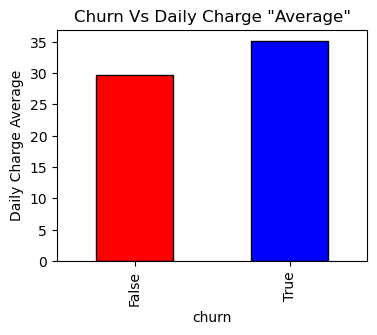

In [15]:
df.groupby('churn')['total day charge'].mean().plot(kind='bar',figsize=(4,3),color=['red','blue'],ylabel='Daily Charge Average',title='Churn Vs Daily Charge "Average"',edgecolor='black')

In [16]:
df['state']=pd.Categorical(df['state'])

In [17]:
df['state']=df['state'].cat.codes

In [18]:
df['phone number']=df['phone number'].astype(str)

In [19]:
df.drop(columns=['phone number'],inplace=True)

In [20]:
df['voice mail plan']=pd.Categorical(df['voice mail plan'])

In [21]:
df['voice mail plan']=df['voice mail plan'].cat.codes

In [22]:
df['international plan']=pd.Categorical(df['international plan'])

In [23]:
df['international plan']=df['international plan'].cat.codes

In [24]:
df['churn']=pd.Categorical(df['churn'])

In [25]:
df['churn']=df['churn'].cat.codes

In [26]:
df.groupby('churn')['international plan'].mean()

churn
0    0.065263
1    0.283644
Name: international plan, dtype: float64

In [27]:
df_corr=df.corr(method='pearson')

<Axes: >

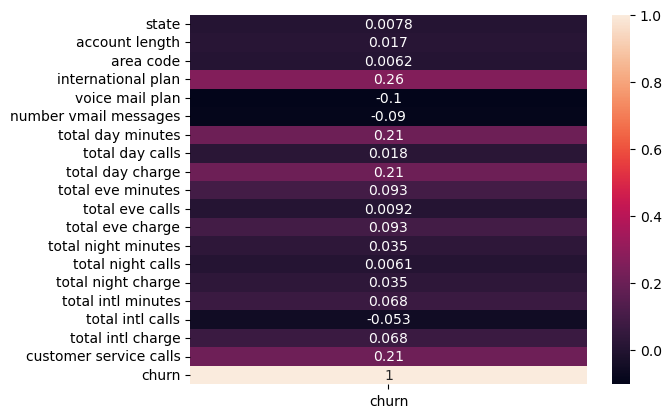

In [28]:
sns.heatmap(df_corr[['churn']],annot=True)

In [29]:
df.drop(columns=['state'],inplace=True)

In [30]:
x=df.iloc[:,:-1]

In [31]:
y=df.iloc[:,-1:]

In [32]:
y.value_counts()

churn
0        2850
1         483
Name: count, dtype: int64

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  
                                                    test_size = 0.2,  
                                                    random_state = 0)

In [34]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [35]:
rfc=RandomForestClassifier()

In [36]:
rfc.fit(x_train,y_train)

C:\Users\Basel\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [37]:
predictions=rfc.predict(x_test)

In [38]:
print("Accuracy Is " + str(round(accuracy_score(predictions,y_test),4)*100)+ " %")

Accuracy Is 95.95 %
